# From metric spaces to simplicial complexe


The basic pipeline of TDA is summarized below:


1- Dataset: assumed to be a finite metric space where the distance function is either induced by the metric of the ambient space (e.g., the Euclidean space) or an interensic metric (usually given by a distance matrix). 

2- creating a simplicial complex: Using Vitories-Rips or Céch ..., we construct a filtered simplicial complex  that reflects the topological structure of data at different scales.

3- Computing persistent homology: applying the $k$th perssitence homology to the filtered simplicial complex constructed in (2) to extract the topological and geometrical features.

4- Storing topological features: the extracted topological information are families of features of the data (stored as persistence diagrams or barcodes) and can be used for different tasks in data science such as visualization and classifications. In many applications, they were used as complimetry features to design machine learning modeles.



In this notebook we learn how to construct a (filtered) simplicial complex from a data set and how to plot it. Lets first import the needed libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Example 1:

In TDA, data is assumed to be a finite metric space where the distance function is either induced by the metric of the ambient space (e.g., the Euclidean space) or an interensic metric (usually given by a distance matrix). Lets start with some points in some Eucleadian space:

In [2]:
# DATA

import numpy as np

def euclidean_distance(p1, p2):
    """Computes |.|_2 distance between two points in some R^m."""
    return np.sqrt(np.sum((p1 - p2)**2))

def distance_matrix(points):
    """Computes the distance matrix for a set of points using the euclidean_distance metric."""
    n = len(points)
    distance_matrix = np.zeros((n, n)) #initiate an n by n matrix
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance( points[i], points[j])
    return distance_matrix


[[0.         1.         1.         1.        ]
 [1.         0.         1.41421356 1.41421356]
 [1.         1.41421356 0.         1.41421356]
 [1.         1.41421356 1.41421356 0.        ]]


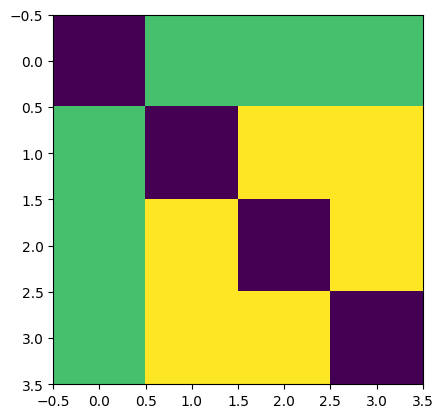

In [3]:
# Example usage: "points" is a list of vectors in 3D space

points = [
    np.array([0, 0, 0]),
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1])
       
]


D = np.array(distance_matrix(points))
print(D)
plt.imshow(D)
plt.show()

## Creating a  Simplicial Complex


Let $(X,d)$ be a metric space. For each $r \geq 0$, define a simplicial complex $X_r = (V_r, \Sigma_r)$, where for any $r$ the vertex set $V_r$ is $X$ and a subset $S\subset V_r$ is a simplex if   

$$ \forall x,y\in S \qquad d(x,y)\leq r
$$

Thus, the collecetion of $0$-simplices contains the elements of $X$ and the $1$-simplices form the set
$$
\{\{x_i,x_j\} \mid x_i,x_j \in X, d(x_i,x_j) \leq r\},
$$

Let's write a function to generate such a simplicial complex of dimention 2 for each $r \geq 0$. 

In [4]:
import numpy as np
from ripser import ripser

def VR_simplicial_complex(distance_matrix, r):
    """
    Computes the vertex set, edge set, and triangle set of a 2-dimensional Vietoris-Rips complex from a distance matrix.

    Parameters
    ----------
    distance_matrix : ndarray
        The pairwise distance matrix between points.
    r : float
        The parameter for constructing edges in the complex.

    Returns
    -------
    vertex_set : set
        A set containing the indices of the vertices in the complex.
    edge_set : set
        A set containing the indices of the edges in the complex, represented as pairs of vertices.
    triangle_set : set
        A set containing the indices of the triangles in the complex, represented as triples of vertices.
    """
    
    # Create empty sets for vertices, edges, and triangles
    n = distance_matrix.shape[0]
    vertex_set = set(range(n))
    edge_set = set()
    triangle_set = set()
    
    # Add edges and triangles to the complex
    for i in range(n):
        for j in range(i + 1, n):
            if distance_matrix[i, j] <= r:
                edge_set.add(frozenset([i, j]))
                for k in range(j + 1, n):
                    if (distance_matrix[i, k] <= r) and (distance_matrix[j, k] <= r):
                        triangle_set.add(frozenset([i, j, k]))

    return vertex_set, edge_set, triangle_set



In [5]:
# Example usage: 

for r in range(1,5):

    # Compute the 2 skeleton of Vietoris-Rips complex at scale r
    print("The Vietoris-Rips complex at scale " +str(r)+":") 
    vertex_set, edge_set, triangle_set= VR_simplicial_complex(D, r=5)

#Print the vertex set, edge set, and triangle set (as a list of sets)
    print()
    print("Vertex set:", [{s} for s in vertex_set])
    print("Edge set:", [set(s) for s in edge_set])
    print("2-faces set:", [set(s) for s in triangle_set])
    print("***"*20)
    print()

The Vietoris-Rips complex at scale 1:

Vertex set: [{0}, {1}, {2}, {3}]
Edge set: [{2, 3}, {1, 2}, {0, 3}, {0, 1}, {0, 2}, {1, 3}]
2-faces set: [{1, 2, 3}, {0, 1, 3}, {0, 2, 3}, {0, 1, 2}]
************************************************************

The Vietoris-Rips complex at scale 2:

Vertex set: [{0}, {1}, {2}, {3}]
Edge set: [{2, 3}, {1, 2}, {0, 3}, {0, 1}, {0, 2}, {1, 3}]
2-faces set: [{1, 2, 3}, {0, 1, 3}, {0, 2, 3}, {0, 1, 2}]
************************************************************

The Vietoris-Rips complex at scale 3:

Vertex set: [{0}, {1}, {2}, {3}]
Edge set: [{2, 3}, {1, 2}, {0, 3}, {0, 1}, {0, 2}, {1, 3}]
2-faces set: [{1, 2, 3}, {0, 1, 3}, {0, 2, 3}, {0, 1, 2}]
************************************************************

The Vietoris-Rips complex at scale 4:

Vertex set: [{0}, {1}, {2}, {3}]
Edge set: [{2, 3}, {1, 2}, {0, 3}, {0, 1}, {0, 2}, {1, 3}]
2-faces set: [{1, 2, 3}, {0, 1, 3}, {0, 2, 3}, {0, 1, 2}]
**********************************************************

# Visualizing simplicial complexes 1 (1-D simplicial Complexes)

We can also plot our complex (up to 2 faces cause we are limitted to 3D). The following function takes in a distance matrix and a non-negative number r plot the underlying graph of a the corsponded Rips complex. 

In [6]:
#Plotting the underlying graph of a simplicial complex also known as 1-skeleton

import networkx as nx

def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

Lets try this function and plot the graph of our simplicial complex.

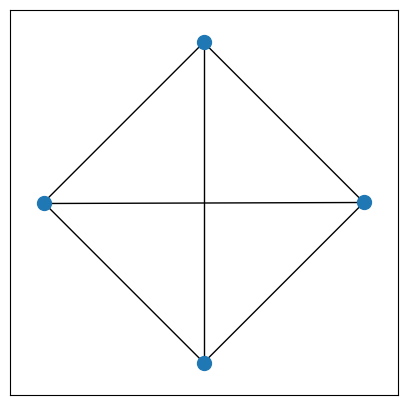

In [7]:
#Plot the 1-skeleton of our simplicial complex at some scale. We need matplotlib.pyplot to do so:

import matplotlib.pyplot as plt

r = 2
G = create_simplicial_complex(D,r)


plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos= nx.circular_layout(G), with_labels = False, node_size = 100)# you can play with pose to get different representations
        
plt.axis('equal')
plt.show()

We can also vary the parameter r and plot a filtration:

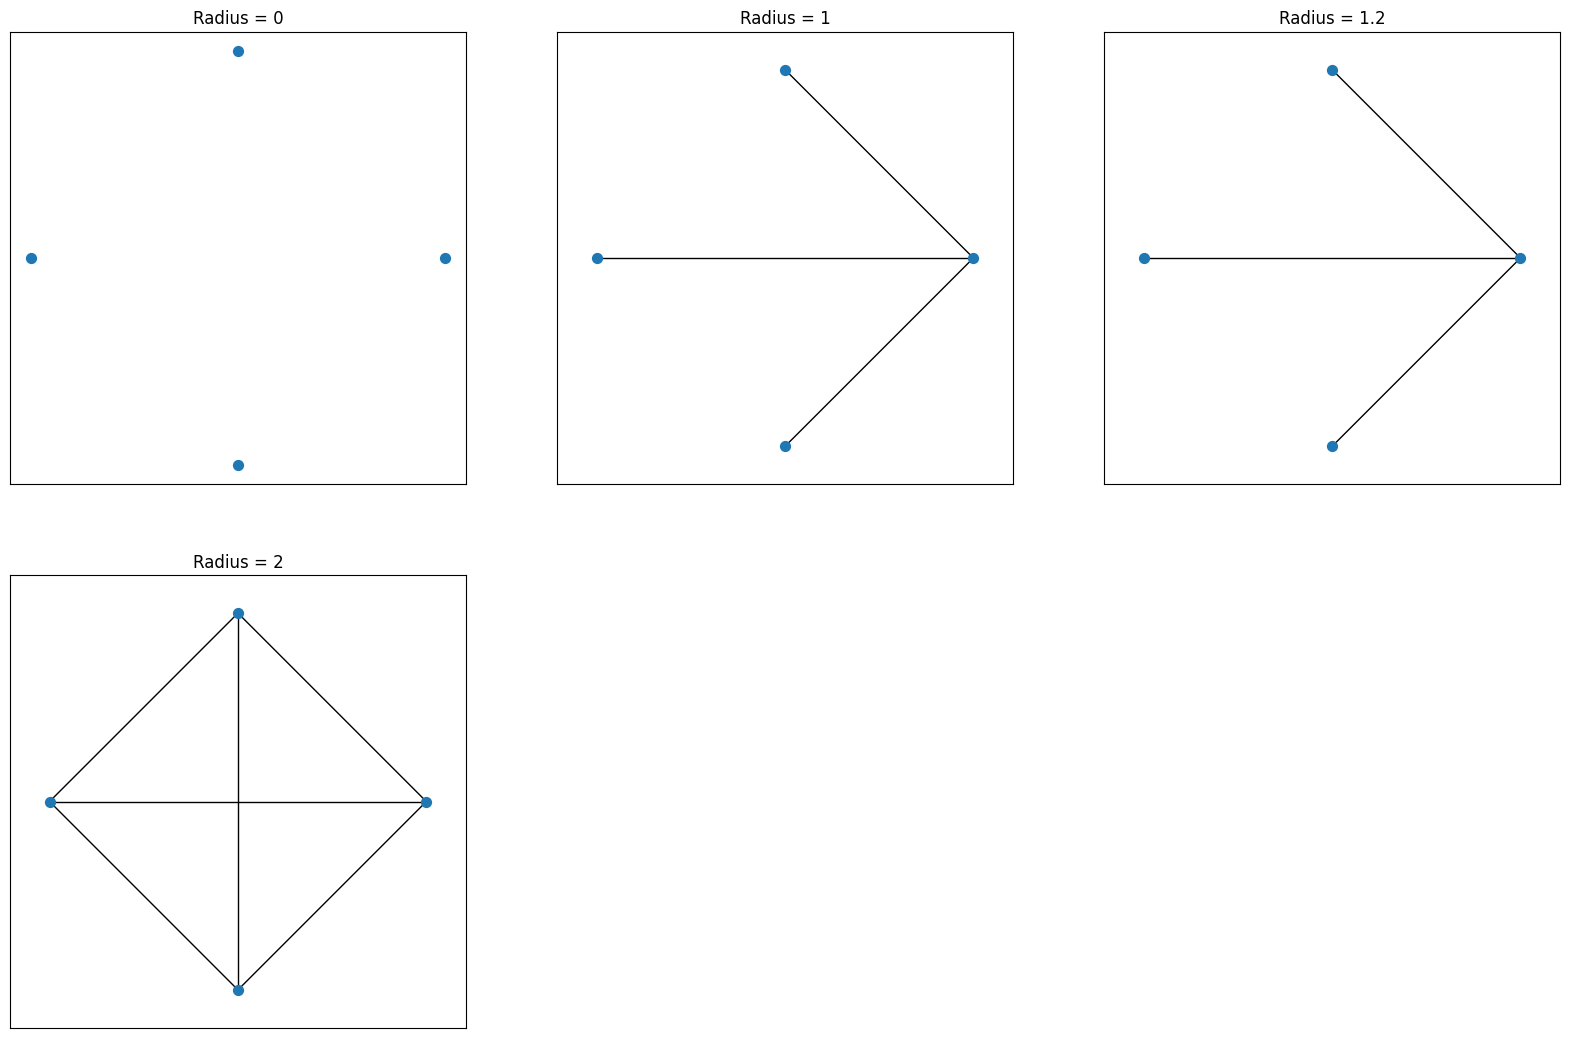

In [8]:
#plot a filtered Rips Complex

rs = [0,1, 1.2, 2] # list of scales

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos= nx.circular_layout(G), with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

# Plotting 2D-Simplicial Complex

Lets move on to the higher dimension. To do so we will creat a list of 2-faces and add them one-by one to our graph. The function in the next cell returns a list of 2-faces of a simplicial complex (compare it with what we did in cell 90). 

In [9]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

Lets apply the fuction to our distance matrix:

In [10]:
G, two_spx_list = create_2_dim_simplicial_complex(D,5)
two_spx_list

[[0, 1, 2],
 [0, 1, 3],
 [0, 2, 1],
 [0, 2, 3],
 [0, 3, 1],
 [0, 3, 2],
 [1, 2, 0],
 [1, 2, 3],
 [1, 3, 0],
 [1, 3, 2],
 [2, 3, 0],
 [2, 3, 1]]

To draw the simplices, we'll use the `Polygon` function imported above. We'll add the triangles one-by-one to a collection, then use plotting tools to display them.

In [11]:
patches = []
pos= nx.circular_layout(G)
for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

C:\Users\yangt\AppData\Local\Temp\ipykernel_12008\2205889503.py:5: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


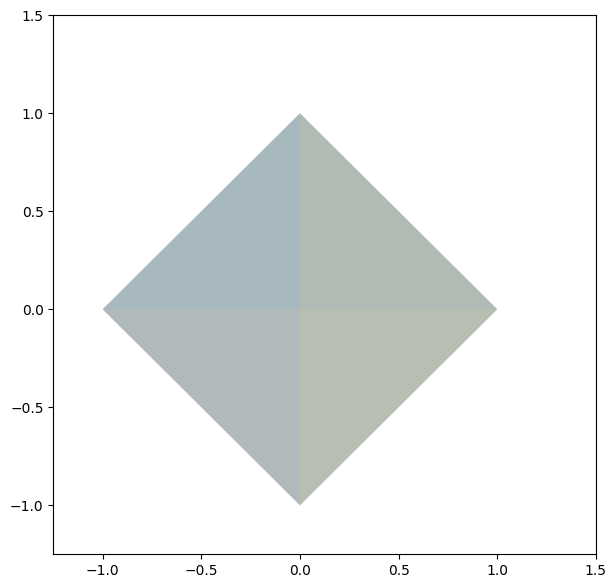

In [12]:
fig, ax = plt.subplots(figsize = (7,7))
#pos = {n:X[n,:] for n in range(len(X))}
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim([-1.25, 1.5])
plt.ylim([-1.25, 1.5])
plt.show()

Now we'll plot the 1-skeleton first and overlay the triangles.

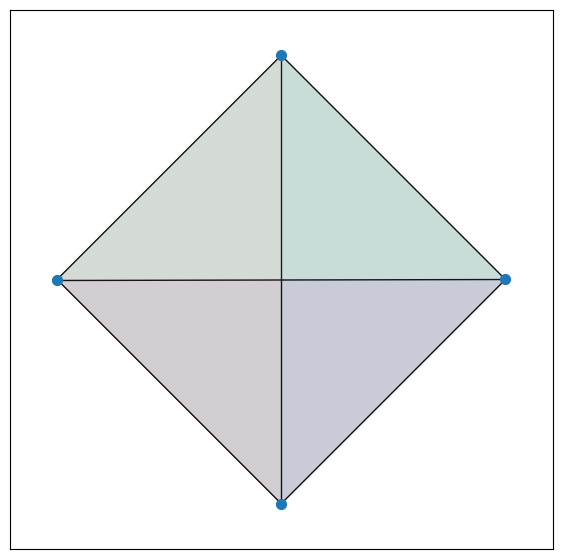

In [13]:
fig, ax = plt.subplots(figsize = (7,7))
#pos= nx.circular_layout(G)
pos= nx.circular_layout(G)

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.05)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

Looks good! Now let's run it on a range of radii.

C:\Users\yangt\AppData\Local\Temp\ipykernel_12008\3686284354.py:12: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


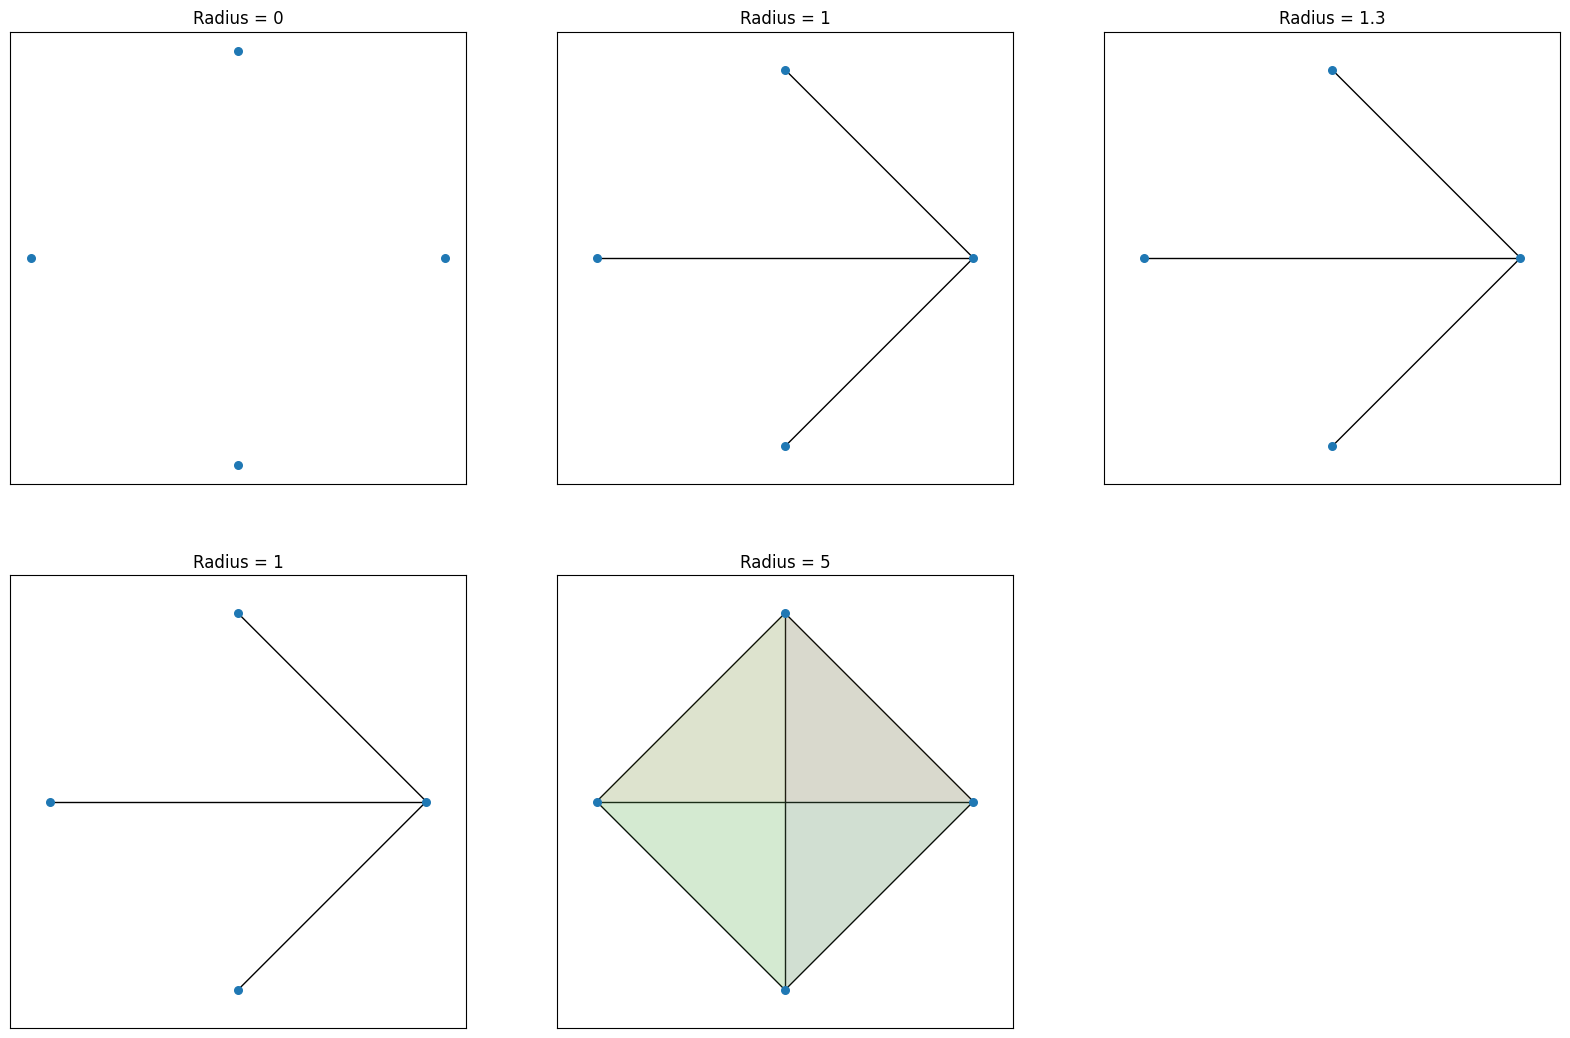

In [14]:
rs = [0,1,1.3,1,5]
pos= nx.circular_layout(G)

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

# Now its your turn:
    

# Example 2:

Consider the following noisy circle in $\mathbb{R}^2$. 



(1)Print the Vietoris-Rips complexes at $r=0, r= 0.1, r=0.3$.

(2) Plot the 1-skeleta of the Vietoris-Rips complexes for $r\in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]$.

(3) Plot the 2-skeleta of the Vietoris-Rips complexes for $r\in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]$.

(4) Plot the 1-skeleton first and overlay the triangles for $r\in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]$.


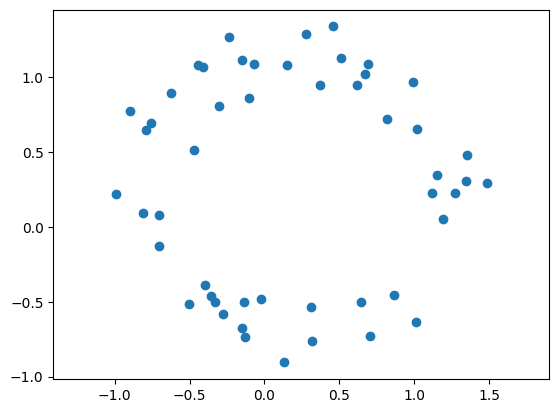

In [15]:
# creating a noisy circle

num_points = 50
mean=[0,0]
cov= np.array([[1,0],[0,1]]) # diagonal covariance

X = np.random.multivariate_normal(mean, cov, size = num_points) #Draw random samples from a multivariate normal distribution.

X = X.T/np.linalg.norm(X,axis = 1) # Normalizing X 

X = X.T + 0.5*np.random.rand(num_points,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

[[0.         1.25570069 1.85207157 ... 1.62386389 1.79174922 0.79391976]
 [1.25570069 0.         1.80491678 ... 1.77474391 1.77379327 1.81002025]
 [1.85207157 1.80491678 0.         ... 0.31063483 0.064355   1.53407552]
 ...
 [1.62386389 1.77474391 0.31063483 ... 0.         0.25080571 1.23566761]
 [1.79174922 1.77379327 0.064355   ... 0.25080571 0.         1.4699642 ]
 [0.79391976 1.81002025 1.53407552 ... 1.23566761 1.4699642  0.        ]]


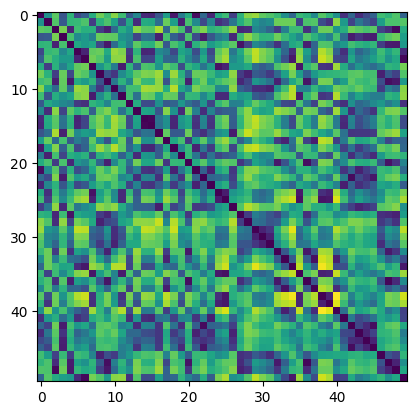

In [16]:
# creating the distance matrix of X:

from sklearn.metrics import pairwise_distances

D = pairwise_distances(X)
print(D)

plt.imshow(D)
plt.show()

In [17]:
# (1) Print the Vietoris-Rips complexes at  𝑟=0,𝑟=0.1,𝑟=0.3.

rs = [0, 0.1, 0.3]
for r in rs:
    vr = VR_simplicial_complex(D, r)
    print(vr)

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, set(), set())
({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {frozenset({42, 22}), frozenset({49, 6}), frozenset({20, 36}), frozenset({36, 47}), frozenset({9, 47}), frozenset({0, 21}), frozenset({48, 2}), frozenset({14, 15}), frozenset({42, 45})}, set())
({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {frozenset({48, 36}), frozenset({32, 36}), frozenset({17, 37}), frozenset({9, 2}), frozenset({16, 26}), frozenset({24, 39}), frozenset({20, 36}), frozenset({25, 7}), frozenset({45, 22}), frozenset({9, 47}), frozen

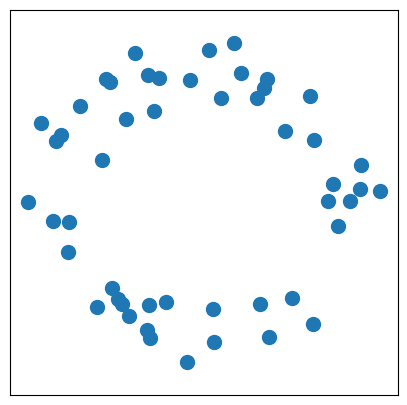

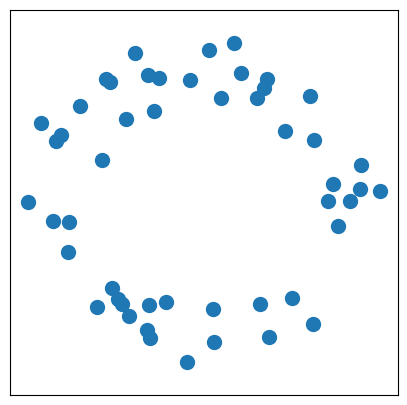

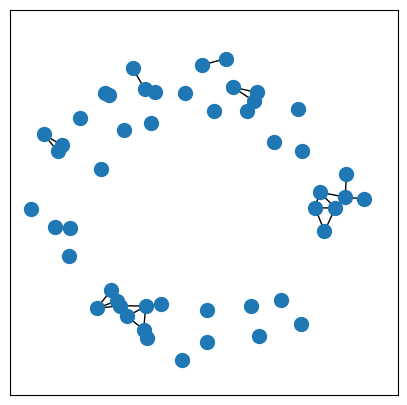

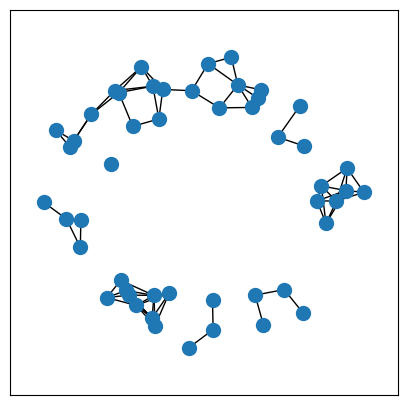

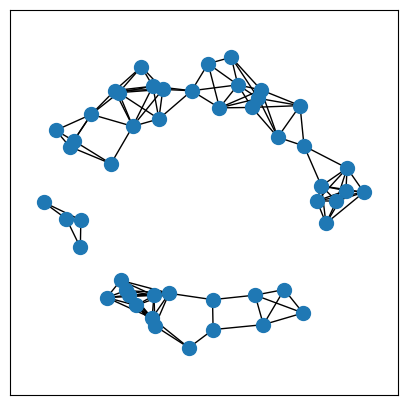

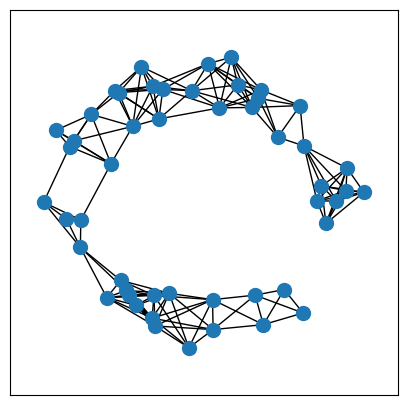

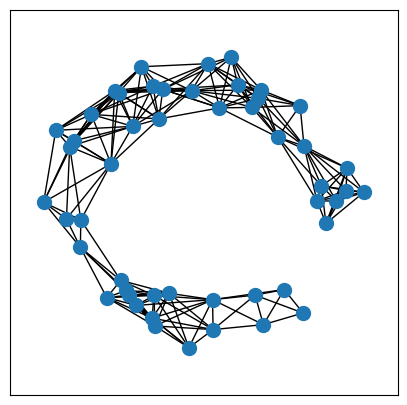

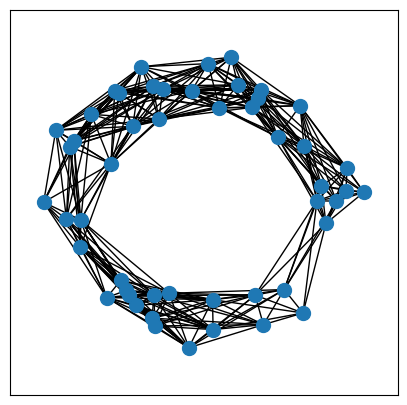

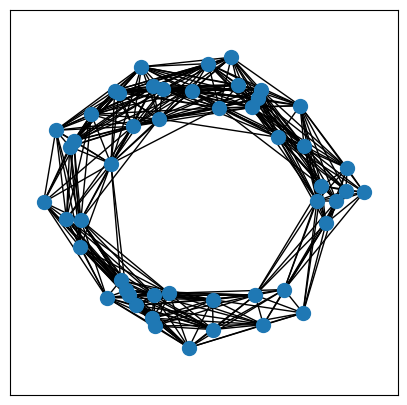

In [18]:
#(2) Plot the 1-skeleta of the Vietoris-Rips complexes for  𝑟∈[0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]

pos = {n:X[n,:] for n in range(len(X))}
r = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]
for i in r:
    G = create_simplicial_complex(D,i)
    plt.figure(figsize = (5,5))
    nx.draw_networkx(G, pos=pos, with_labels = False, node_size = 100)# you can play with pose to get different representations
    plt.axis('equal')
plt.show()

C:\Users\yangt\AppData\Local\Temp\ipykernel_12008\1823841810.py:15: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


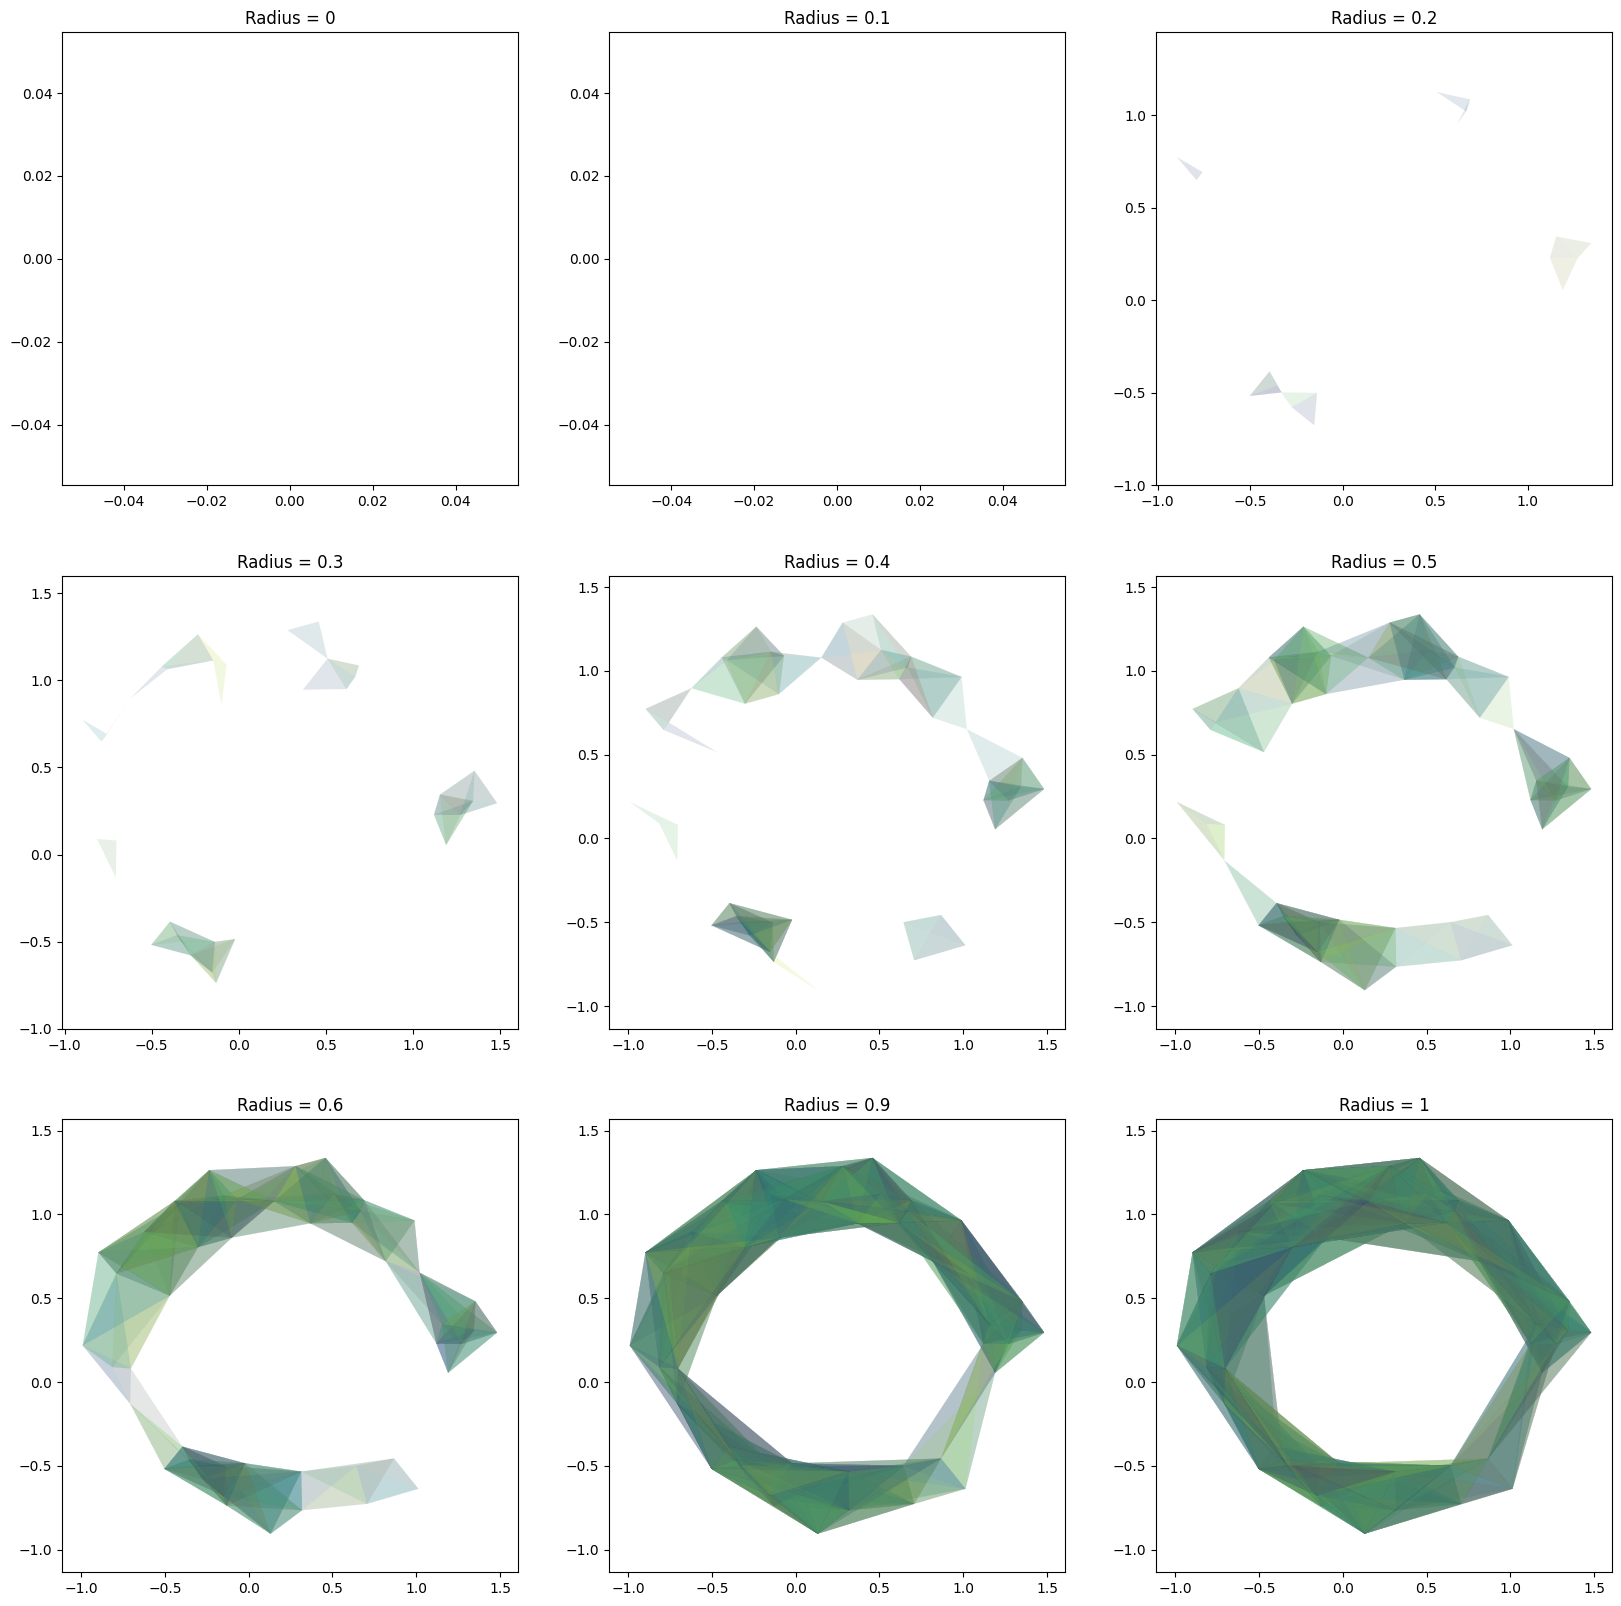

In [19]:
#(3) Plot the 2-skeleta of the Vietoris-Rips complexes for  𝑟∈[0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]

#pos= nx.circular_layout(G)
pos= {n:X[n,:] for n in range(len(X))}
rs=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    #nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

C:\Users\yangt\AppData\Local\Temp\ipykernel_12008\294289462.py:15: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


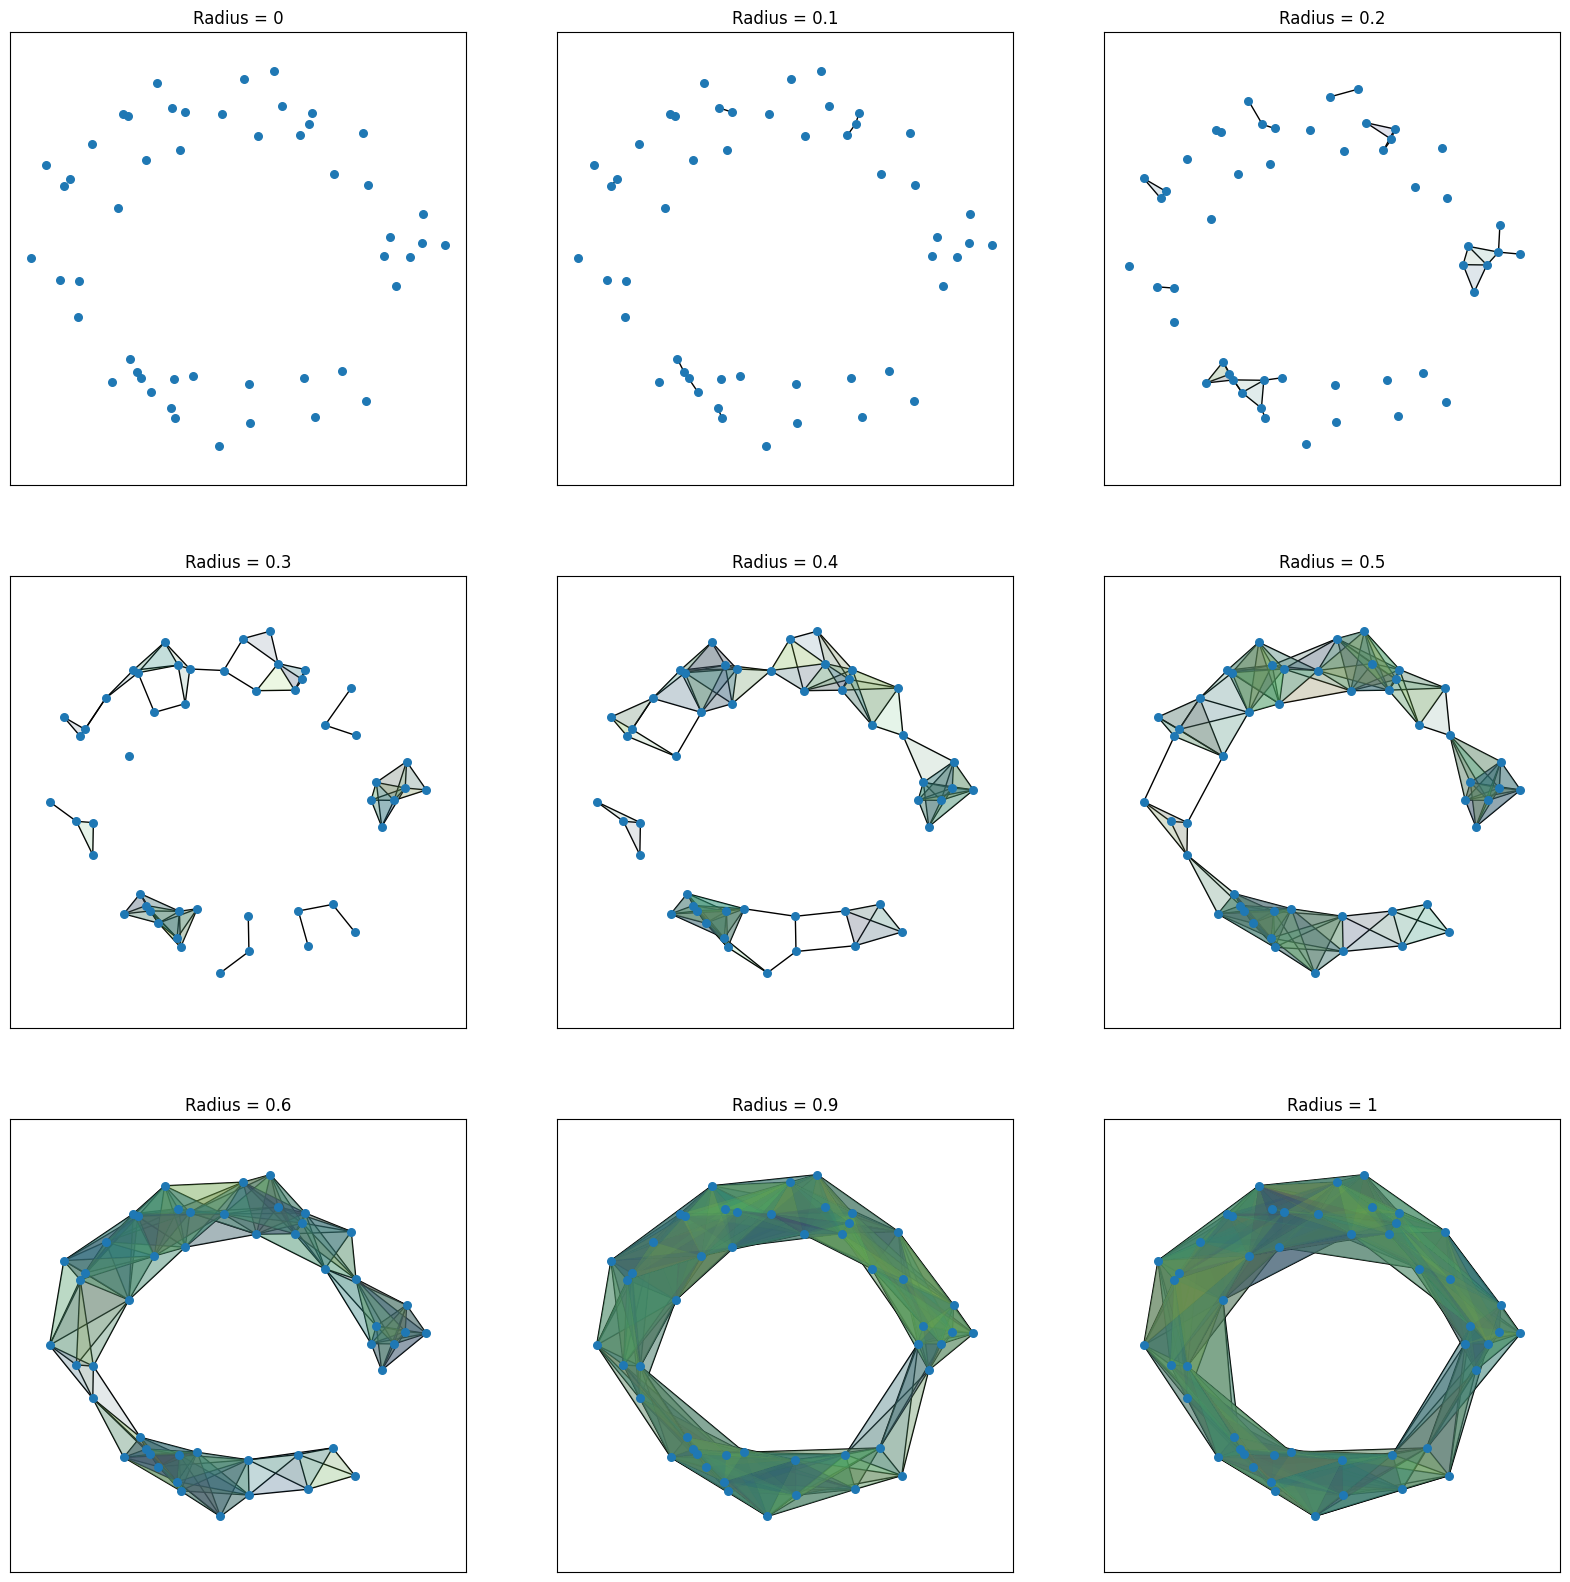

In [20]:
#(4) Plot the 1-skeleta and overlay triangles

#pos= nx.circular_layout(G)
pos= {n:X[n,:] for n in range(len(X))}
rs=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()


# Exercise 2:

The edit distance is a way of quantifying how dissimilar two words are to one another by counting the minimum number of operations required to transform one string into the other.

You can install via pip:



In [21]:
pip install editdistance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Lets see how we can compute the edit distance between two words:

In [22]:
import editdistance

x= editdistance.eval('Soheil', 'Aditya')

print('The edit distance between Soheil and Aditya is', x)

The edit distance between Soheil and Aditya is 6


Here is the list of names in our class (feel free to change if you see any mistakes). Compute the edit distance between all pairs of names and store in a matrix. Then create 

In [23]:
names = ['Soheil','Aditya', 'Tomas', 'Ethan', 'Sarah', 'Alex', 'Jared', 'Tianbo', 'Angel', 'Kathy', 'Emily', 'Rachel','Rishabh', 'Lara', 'Oliver', 'Daniel']

In [24]:
# Compute the distance between all pair of names and store the results in a matrix.


# Print and plot the matrix.


In [25]:
# Construct the Vietoris-Rips complexes at  𝑟=1,r= 2, 𝑟= 3 and print it.

In [26]:
#(2)Plot the 1-skeleta of the Vietoris-Rips complexes for  r in [0,1,2,3,4,5,6]

In [27]:
#(3) Plot the 2-skeleta of the Vietoris-Rips complexes for  r in [0,1,2,3,4,5,6]